# Problem Statement

A certain organization wants an early estimate of their employee churn out rate. So the HR department gathered the data regarding the employee’s salary hike and the churn out rate in a financial year. The analytics team will have to perform an analysis and predict an estimate of employee churn based on the salary hike. Build a Simple Linear Regression model with churn out rate as the target variable. Apply necessary transformations and record the RMSE and correlation coefficient values for different models.

------------- ### ---------------

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
plt.rcParams['figure.figsize'] = (15,15)

In [2]:
data = pd.read_csv('emp_data.csv')
data.shape

(10, 2)

We have 10 rows and 2 columns

In [3]:
data.describe()

,Salary_hike,Churn_out_rate
count,10.000000,10.000000
mean,1688.600000,72.900000
std,92.096809,10.257247
min,1580.000000,60.000000
25%,1617.500000,65.750000
50%,1675.000000,71.000000
75%,1724.000000,78.750000
max,1870.000000,92.000000


In [4]:
data.columns

Index(['Salary_hike', 'Churn_out_rate'], dtype='object')

In [5]:
data = data.rename(columns = {'Churn_out_rate':'Churn_rate'})
data

,Salary_hike,Churn_rate
0,1580,92
1,1600,85
2,1610,80
3,1640,75
4,1660,72
5,1690,70
6,1706,68
7,1730,65
8,1800,62
9,1870,60


Lets Visualize our dataset

<AxesSubplot:>

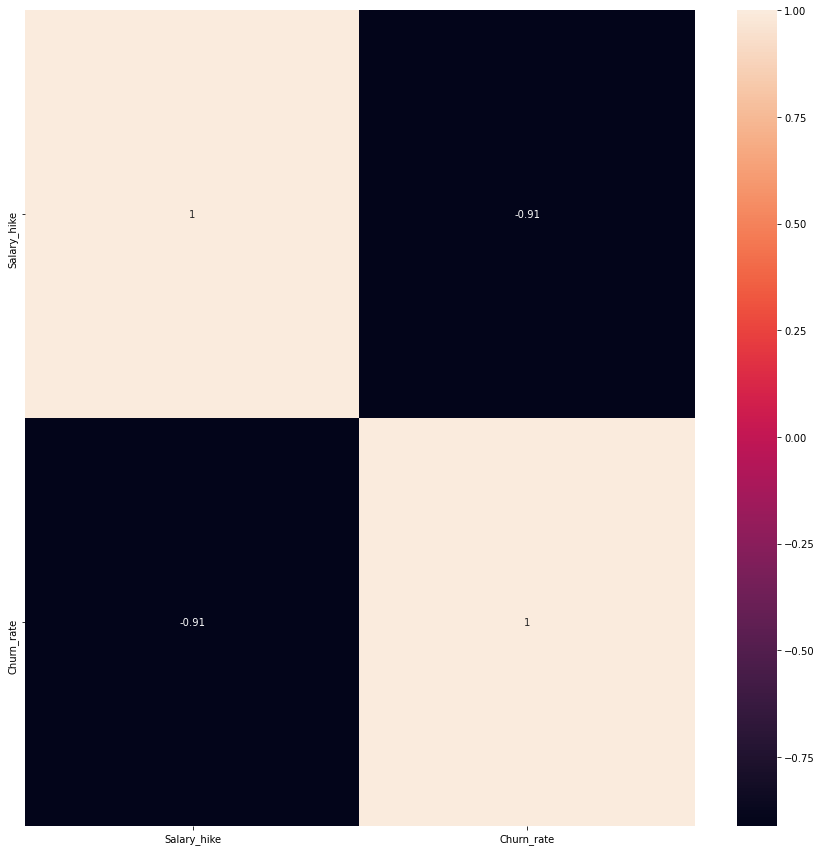

In [6]:
sns.heatmap(data.corr(), annot=True)

In [7]:
data.cov()

,Salary_hike,Churn_rate
Salary_hike,8481.822222,-861.266667
Churn_rate,-861.266667,105.211111


{'whiskers': [<matplotlib.lines.Line2D at 0x24e32cf7880>,
 'caps': [<matplotlib.lines.Line2D at 0x24e32cf7f40>,
 'boxes': [<matplotlib.lines.Line2D at 0x24e32cf7520>,
 'medians': [<matplotlib.lines.Line2D at 0x24e3264a640>,
 'fliers': [<matplotlib.lines.Line2D at 0x24e3264a9a0>,
 'means': []}

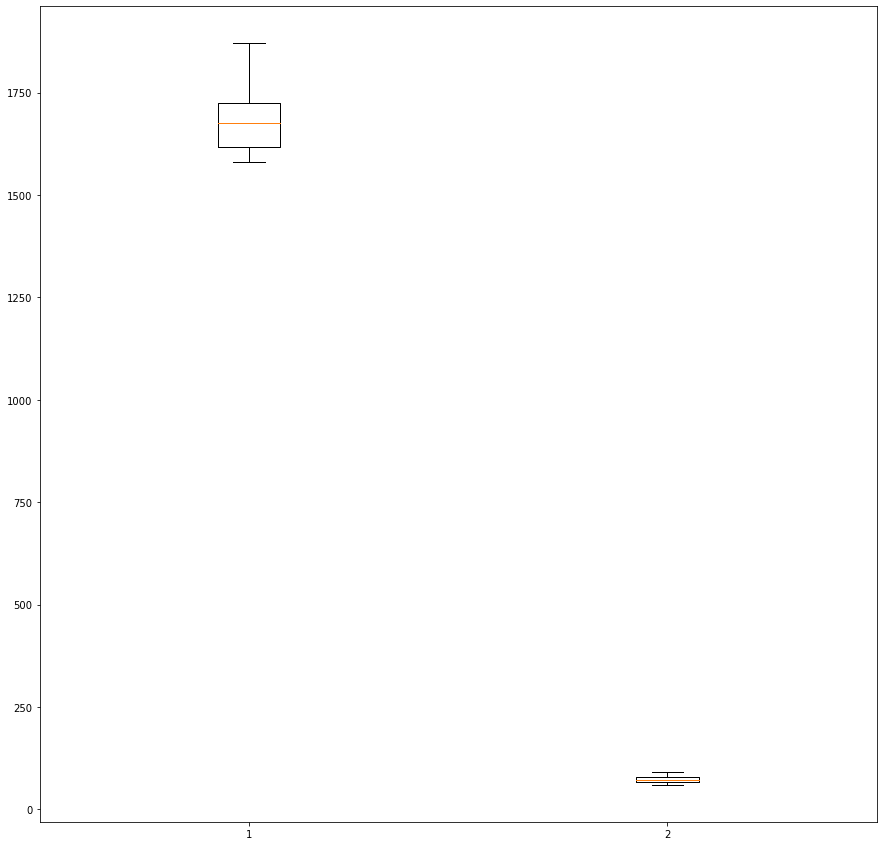

In [8]:
plt.boxplot(data)

C:\Users\jaich\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Salary_hike', ylabel='Churn_rate'>

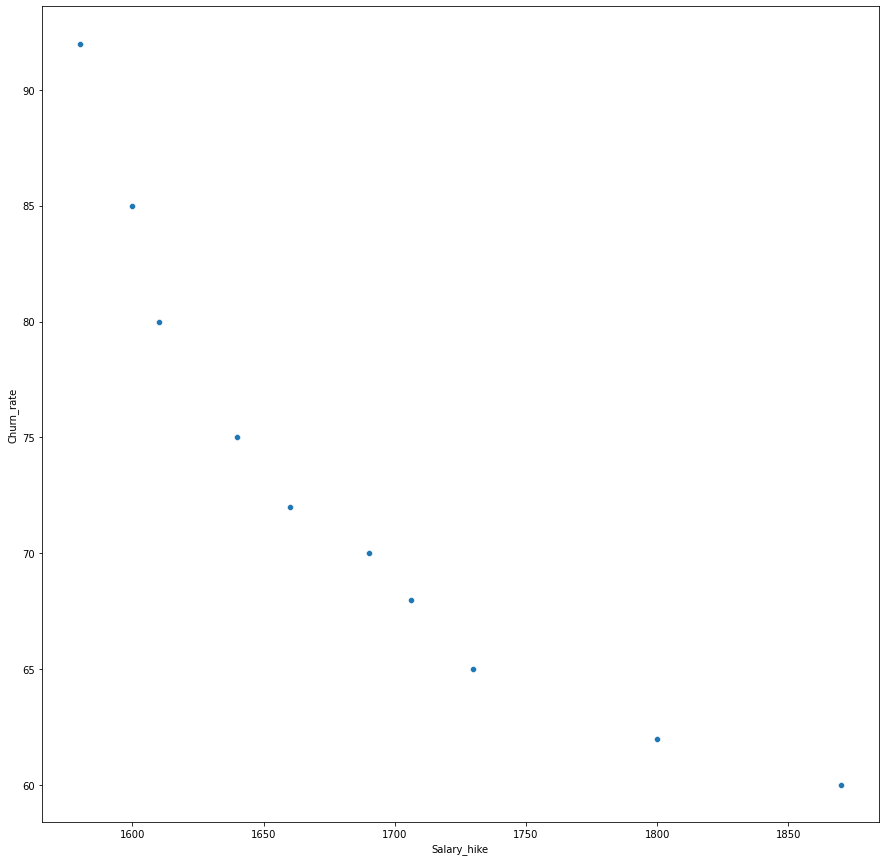

In [9]:
sns.scatterplot(data['Salary_hike'], data['Churn_rate'])

Lets Build our models

In [10]:
import statsmodels.formula.api as smf

## Model 1 - Simple Linear Regression

In [12]:
model1 = smf.ols('Churn_rate ~ Salary_hike', data=data).fit()
model1.summary()

C:\Users\jaich\anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Churn_rate   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     39.40
Date:                Tue, 21 Sep 2021   Prob (F-statistic):           0.000239
Time:                        14:44:58   Log-Likelihood:                -28.046
No. Observations:                  10   AIC:                             60.09
Df Residuals:                       8   BIC:                             60.70
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     244.3649     27.352      8.934      0.000     181.291     307.439
Salary_hike    -0.1015      0.016     -6.277      0.000      -0.139      -0.064
==============================================================================
Omnibus:                        2.201   Durbin-Watson:                   0.562
Prob(Omnibus):                  0.333   Jarque-Bera (JB):                1.408
Skew:                           0.851   Prob(JB):                        0.495
Kurtosis:                       2.304   Cond. No.                     3.27e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.27e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [13]:
pred1 = model1.predict(pd.DataFrame(data['Salary_hike']))
pred1

0    83.927531
1    81.896678
2    80.881252
3    77.834973
4    75.804120
5    72.757840
6    71.133158
7    68.696134
8    61.588149
9    54.480164
dtype: float64

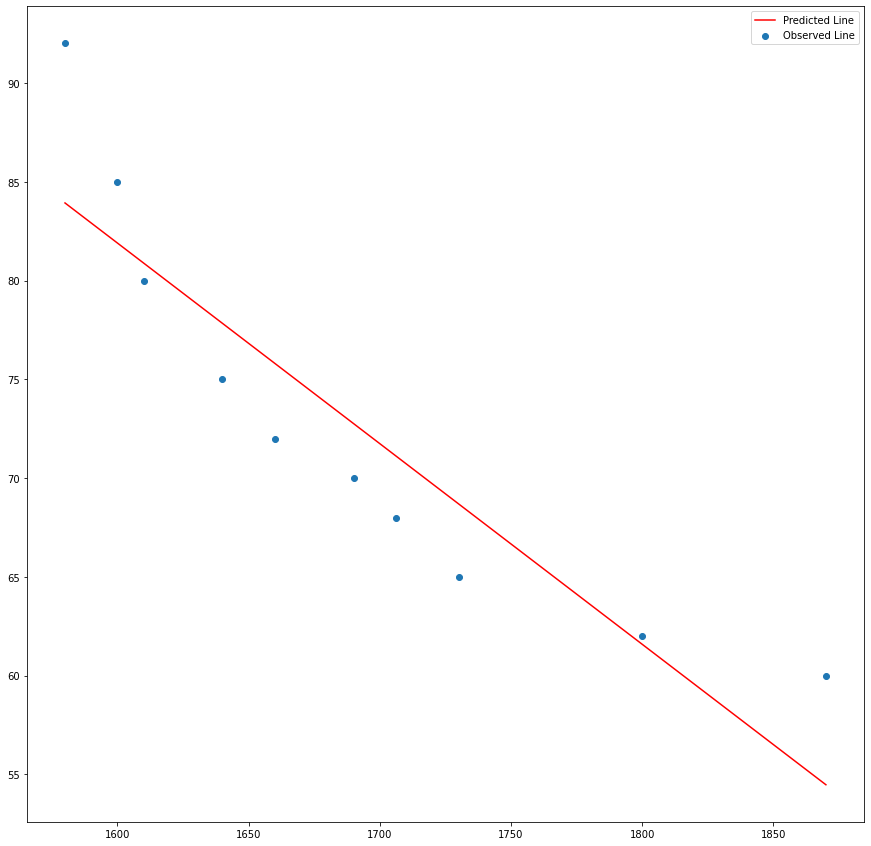

In [15]:
plt.scatter(data['Salary_hike'],data['Churn_rate'])
plt.plot(data['Salary_hike'], pred1,"r")
plt.legend(['Predicted Line', 'Observed Line'])
plt.show()

In [16]:
# RMSE of Model1

res1 = data['Churn_rate'] - pred1
res_sqrt1 = res1 * res1
mse1 = np.mean(res_sqrt1)
rmse = np.sqrt(mse1)
rmse

3.997528462337793

## Log Transformation

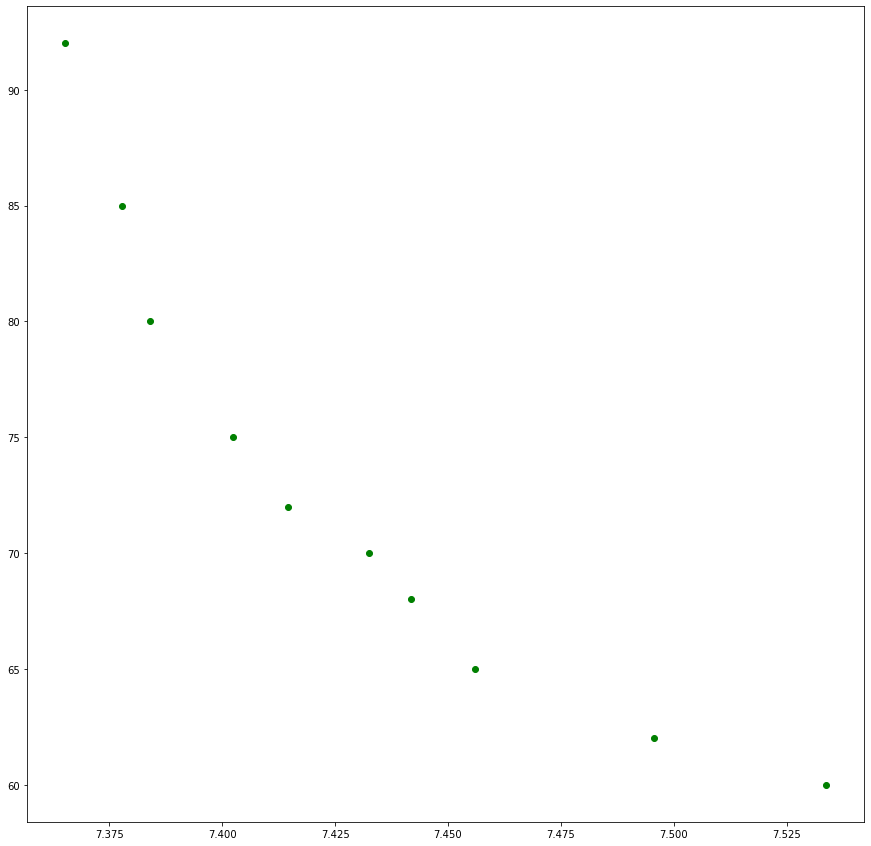

In [17]:
plt.scatter(x=np.log(data['Salary_hike']), y = data['Churn_rate'], color='green')

In [18]:
np.corrcoef(np.log(data['Salary_hike']),data['Churn_rate'])

array([[ 1.        , -0.92120773],
       [-0.92120773,  1.        ]])

In [19]:
model2 = smf.ols('Churn_rate ~ np.log(Salary_hike)', data=data).fit()
model2.summary()

C:\Users\jaich\anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Churn_rate   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     44.85
Date:                Tue, 21 Sep 2021   Prob (F-statistic):           0.000153
Time:                        14:48:25   Log-Likelihood:                -27.502
No. Observations:                  10   AIC:                             59.00
Df Residuals:                       8   BIC:                             59.61
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            1381.4562    195.402      7.070      0.000     930.858    1832.054
np.log(Salary_hike)  -176.1097     26.297     -6.697      0.000    -236.751    -115.468
==============================================================================
Omnibus:                        2.213   Durbin-Watson:                   0.571
Prob(Omnibus):                  0.331   Jarque-Bera (JB):                1.418
Skew:                           0.853   Prob(JB):                        0.492
Kurtosis:                       2.298   Cond. No.                     1.10e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.1e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [20]:
pred2 = model2.predict(pd.DataFrame(data['Salary_hike']))

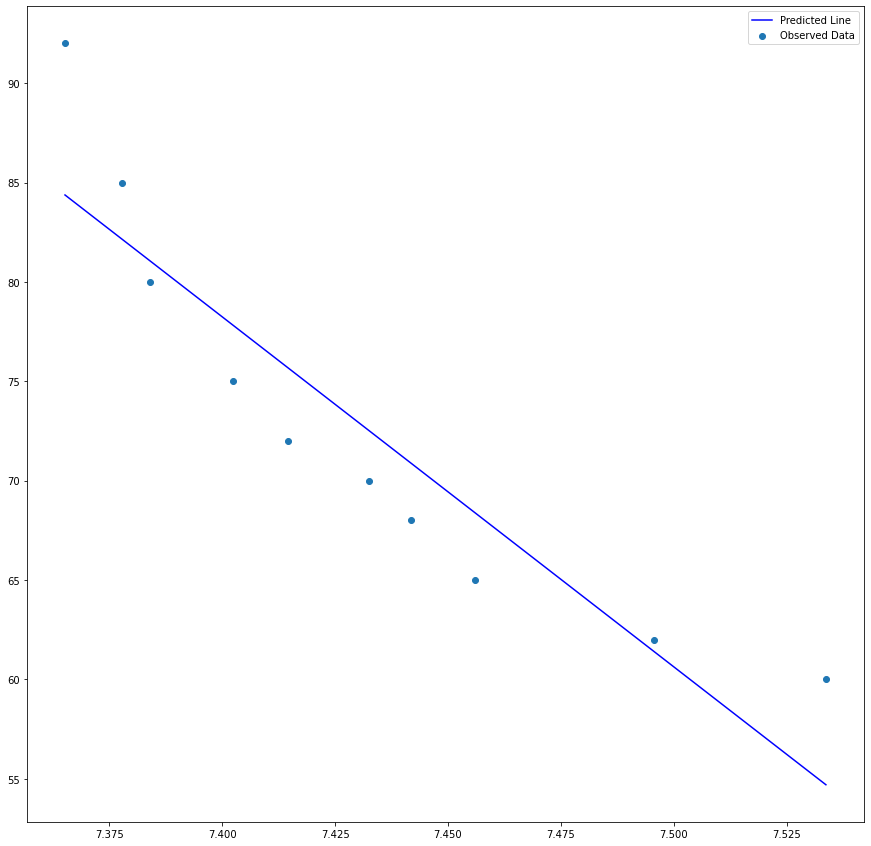

In [21]:
# Regression Line

plt.scatter(np.log(data['Salary_hike']), data['Churn_rate'])
plt.plot(np.log(data['Salary_hike']), pred2, "b")
plt.legend(['Predicted Line', 'Observed Data'])
plt.show()

In [22]:
# Error Calculation

res2 = data['Churn_rate'] - pred2
res_sqrt2 = res2 * res2
mse2 = np.mean(res_sqrt2)
rmse2 = np.sqrt(mse2)
rmse2

3.7860036130227708

## Expontential Transformation

array([[ 1.        , -0.93463607],
       [-0.93463607,  1.        ]])

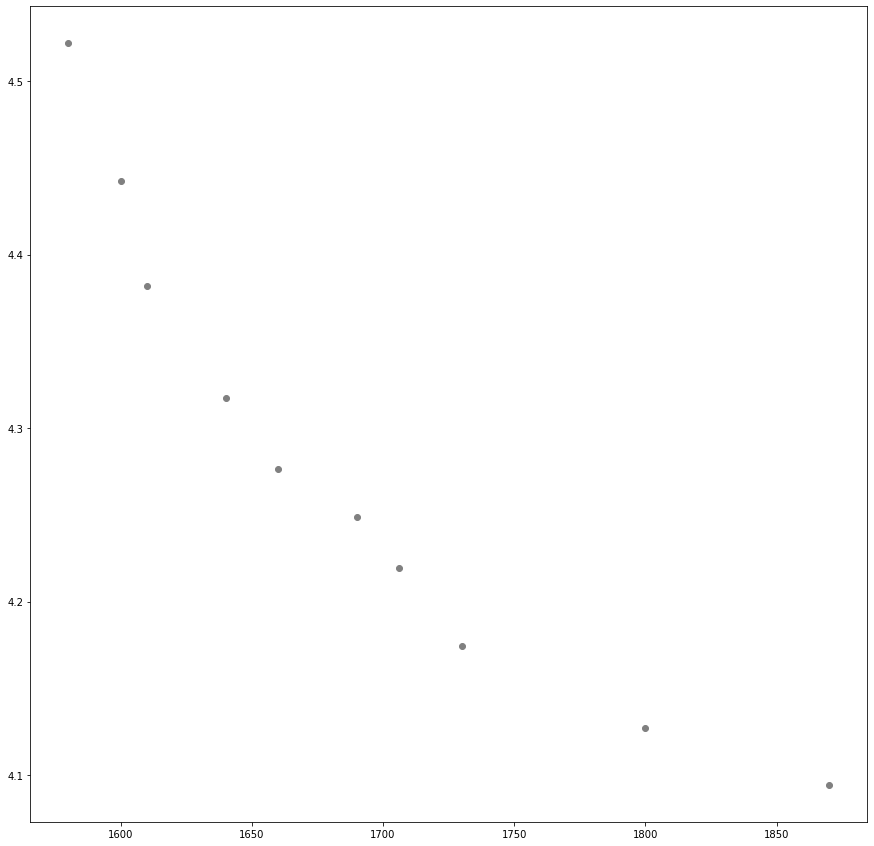

In [23]:
plt.scatter(x=data['Salary_hike'], y = np.log(data['Churn_rate']), color = 'grey')
np.corrcoef(data['Salary_hike'],np.log(data['Churn_rate']))

In [24]:
model3 = smf.ols('np.log(Churn_rate) ~ Salary_hike', data = data).fit()
model3.summary()

C:\Users\jaich\anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     np.log(Churn_rate)   R-squared:                       0.874
Model:                            OLS   Adj. R-squared:                  0.858
Method:                 Least Squares   F-statistic:                     55.26
Date:                Tue, 21 Sep 2021   Prob (F-statistic):           7.38e-05
Time:                        14:51:12   Log-Likelihood:                 16.511
No. Observations:                  10   AIC:                            -29.02
Df Residuals:                       8   BIC:                            -28.42
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       6.6383      0.318     20.902      0.000       5.906       7.371
Salary_hike    -0.0014      0.000     -7.434      0.000      -0.002      -0.001
==============================================================================
Omnibus:                        1.935   Durbin-Watson:                   0.585
Prob(Omnibus):                  0.380   Jarque-Bera (JB):                1.314
Skew:                           0.780   Prob(JB):                        0.519
Kurtosis:                       2.152   Cond. No.                     3.27e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.27e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [25]:
pred3 = model3.predict(pd.DataFrame(data['Salary_hike']))
pred3_at = np.exp(pred3)
pred3_at

0    84.107097
1    81.790758
2    80.656622
3    77.347701
4    75.217518
5    72.131736
6    70.538084
7    68.213379
8    61.861455
9    56.101012
dtype: float64

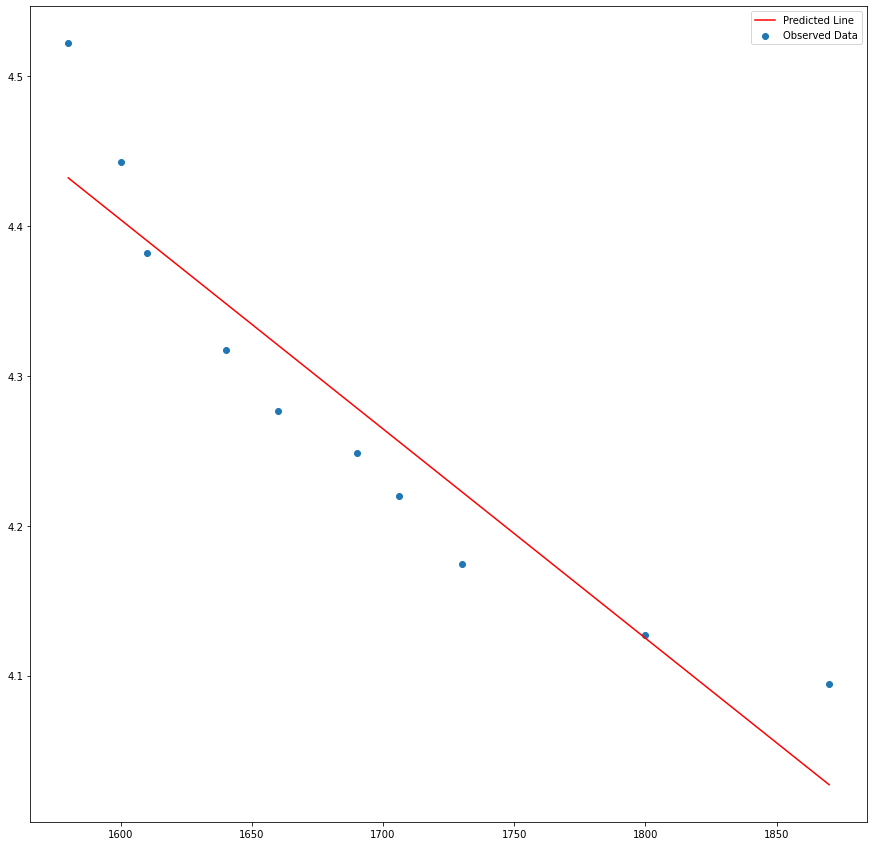

In [26]:
# Regression Line

plt.scatter(data['Salary_hike'],np.log(data['Churn_rate']))
plt.plot(data['Salary_hike'], pred3, "r")
plt.legend(['Predicted Line', 'Observed Data'])
plt.show()

In [27]:
# Error Calculation
res3 = data['Churn_rate'] - pred3_at
res_sqr3 = res3 * res3
mse3 = np.mean(res_sqr3)
rmse3 = np.sqrt(mse3)
rmse3

3.5415493188215756

## Polynomial Transformation

In [28]:
model4 = smf.ols('np.log(Churn_rate) ~ Salary_hike + I(Salary_hike * Salary_hike)',data=data).fit()
model4.summary()

C:\Users\jaich\anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     np.log(Churn_rate)   R-squared:                       0.984
Model:                            OLS   Adj. R-squared:                  0.979
Method:                 Least Squares   F-statistic:                     210.1
Date:                Tue, 21 Sep 2021   Prob (F-statistic):           5.63e-07
Time:                        14:53:19   Log-Likelihood:                 26.728
No. Observations:                  10   AIC:                            -47.46
Df Residuals:                       7   BIC:                            -46.55
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                       23.1762      2.415      9.597      0.000      17.466      28.887
Salary_hike                     -0.0207      0.003     -7.351      0.000      -0.027      -0.014
I(Salary_hike * Salary_hike)  5.605e-06   8.17e-07      6.857      0.000    3.67e-06    7.54e-06
==============================================================================
Omnibus:                        0.520   Durbin-Watson:                   1.272
Prob(Omnibus):                  0.771   Jarque-Bera (JB):                0.506
Skew:                          -0.088   Prob(JB):                        0.777
Kurtosis:                       1.913   Cond. No.                     1.10e+09
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.1e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [29]:
pred4 = model4.predict(pd.DataFrame(data['Salary_hike']))
pred4_at = np.exp(pred4)
pred4_at

0    89.470282
1    84.502725
2    82.261561
3    76.400595
4    73.135942
5    69.076991
6    67.282128
7    65.025854
8    61.079708
9    60.612686
dtype: float64

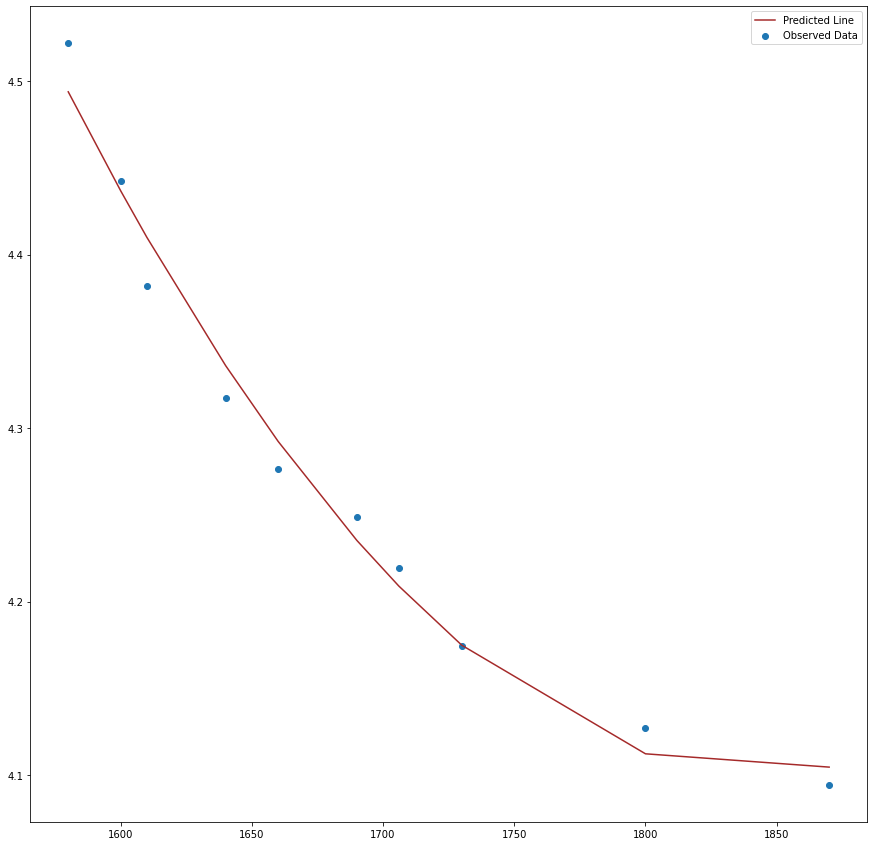

In [30]:
# Regression Line
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2)
X = data.iloc[:, 0:1].values
X_poly = poly_reg.fit_transform(X)
y = data.iloc[:,1].values

plt.scatter(data['Salary_hike'], np.log(data['Churn_rate']))
plt.plot(X,pred4, color = 'brown')
plt.legend(['Predicted Line', 'Observed Data'])
plt.show()

In [33]:
# Error Calculation

res4 = data['Churn_rate'] - pred4
res_sqrt4 = res4 * res4
mse4 = np.mean(res_sqrt4)
rmse4 = np.sqrt(mse4)
rmse4

69.28828701016836

In [34]:
# Choose the best model using RMSE
data = {"MODEL":pd.Series(["SLR", "Log model", "Exp model", "Poly model"]), "RMSE":pd.Series([rmse, rmse2, rmse3, rmse4])}
table_rmse = pd.DataFrame(data)
table_rmse

,MODEL,RMSE
0,SLR,3.997528
1,Log model,3.786004
2,Exp model,3.541549
3,Poly model,69.288287


Though it says the best model is Expoential Model, I will also build Poly model to see the results as the predicted line is very close to observed values